In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [27]:
house_df_org = pd.read_csv('house_train.csv')
house_df = house_df_org.copy()
house_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [28]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
house_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [30]:
isnull_series = house_df.isnull().sum().sort_values(ascending=False)

In [31]:
isnull_series[isnull_series > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

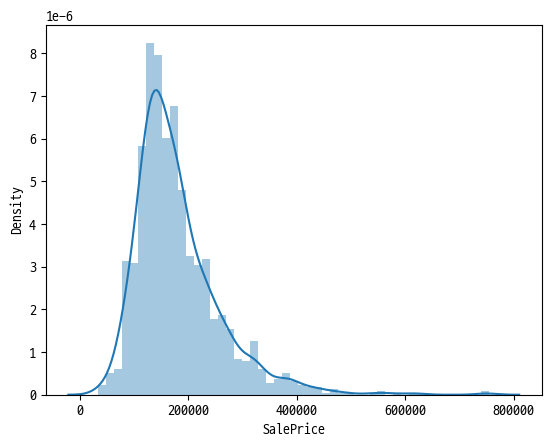

In [32]:
sns.distplot(house_df['SalePrice'])

In [33]:
log_SalePrice = np.log1p(house_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

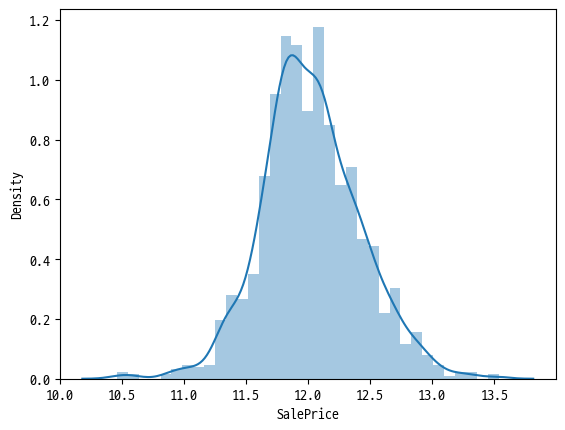

In [34]:
sns.distplot(log_SalePrice)

In [35]:
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(original_SalePrice)

In [36]:
house_df.drop(columns=['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True)

In [37]:
house_df.fillna(house_df.mean(), inplace=True)

In [38]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]

In [39]:
null_column_count

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [40]:
house_df.dtypes[null_column_count.index]

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object

In [41]:
house_df.shape

(1460, 75)

In [42]:
house_df_ohe = pd.get_dummies(house_df)

In [43]:
house_df_ohe.shape

(1460, 271)

In [44]:
house_df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 271 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(33), uint8(234)
memory usage: 755.8 KB


In [45]:
house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]

Series([], dtype: int64)

In [46]:
def get_rmse(model):
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, " 로그 변환된 RMSE:", rmse)
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses


In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split


In [48]:
y = house_df_ohe['SalePrice']
X = house_df_ohe.drop(columns=['SalePrice'])
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 156)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression  로그 변환된 RMSE: 0.13189576579154072
Ridge  로그 변환된 RMSE: 0.12750846334053154
Lasso  로그 변환된 RMSE: 0.17628250556471395


[0.13189576579154072, 0.12750846334053154, 0.17628250556471395]

In [49]:
def get_top_bottom_coef(model, n=10):
    coef = pd.Series(model.coef_, index = X.columns)
    coef_high = coef.sort_values(ascending=False).head(n)
    codef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, codef_low

In [52]:
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24, 10), ncols=3, nrows=1)
    fig.tight_layout()
    for i_num , model in enumerate(models):
        coef_high,coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        axs[i_num].set_title(model.__class__.__name__, size= 25)
        axs[i_num].tick_params(axis='y', direction='in', pad=-128)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax = axs[i_num])

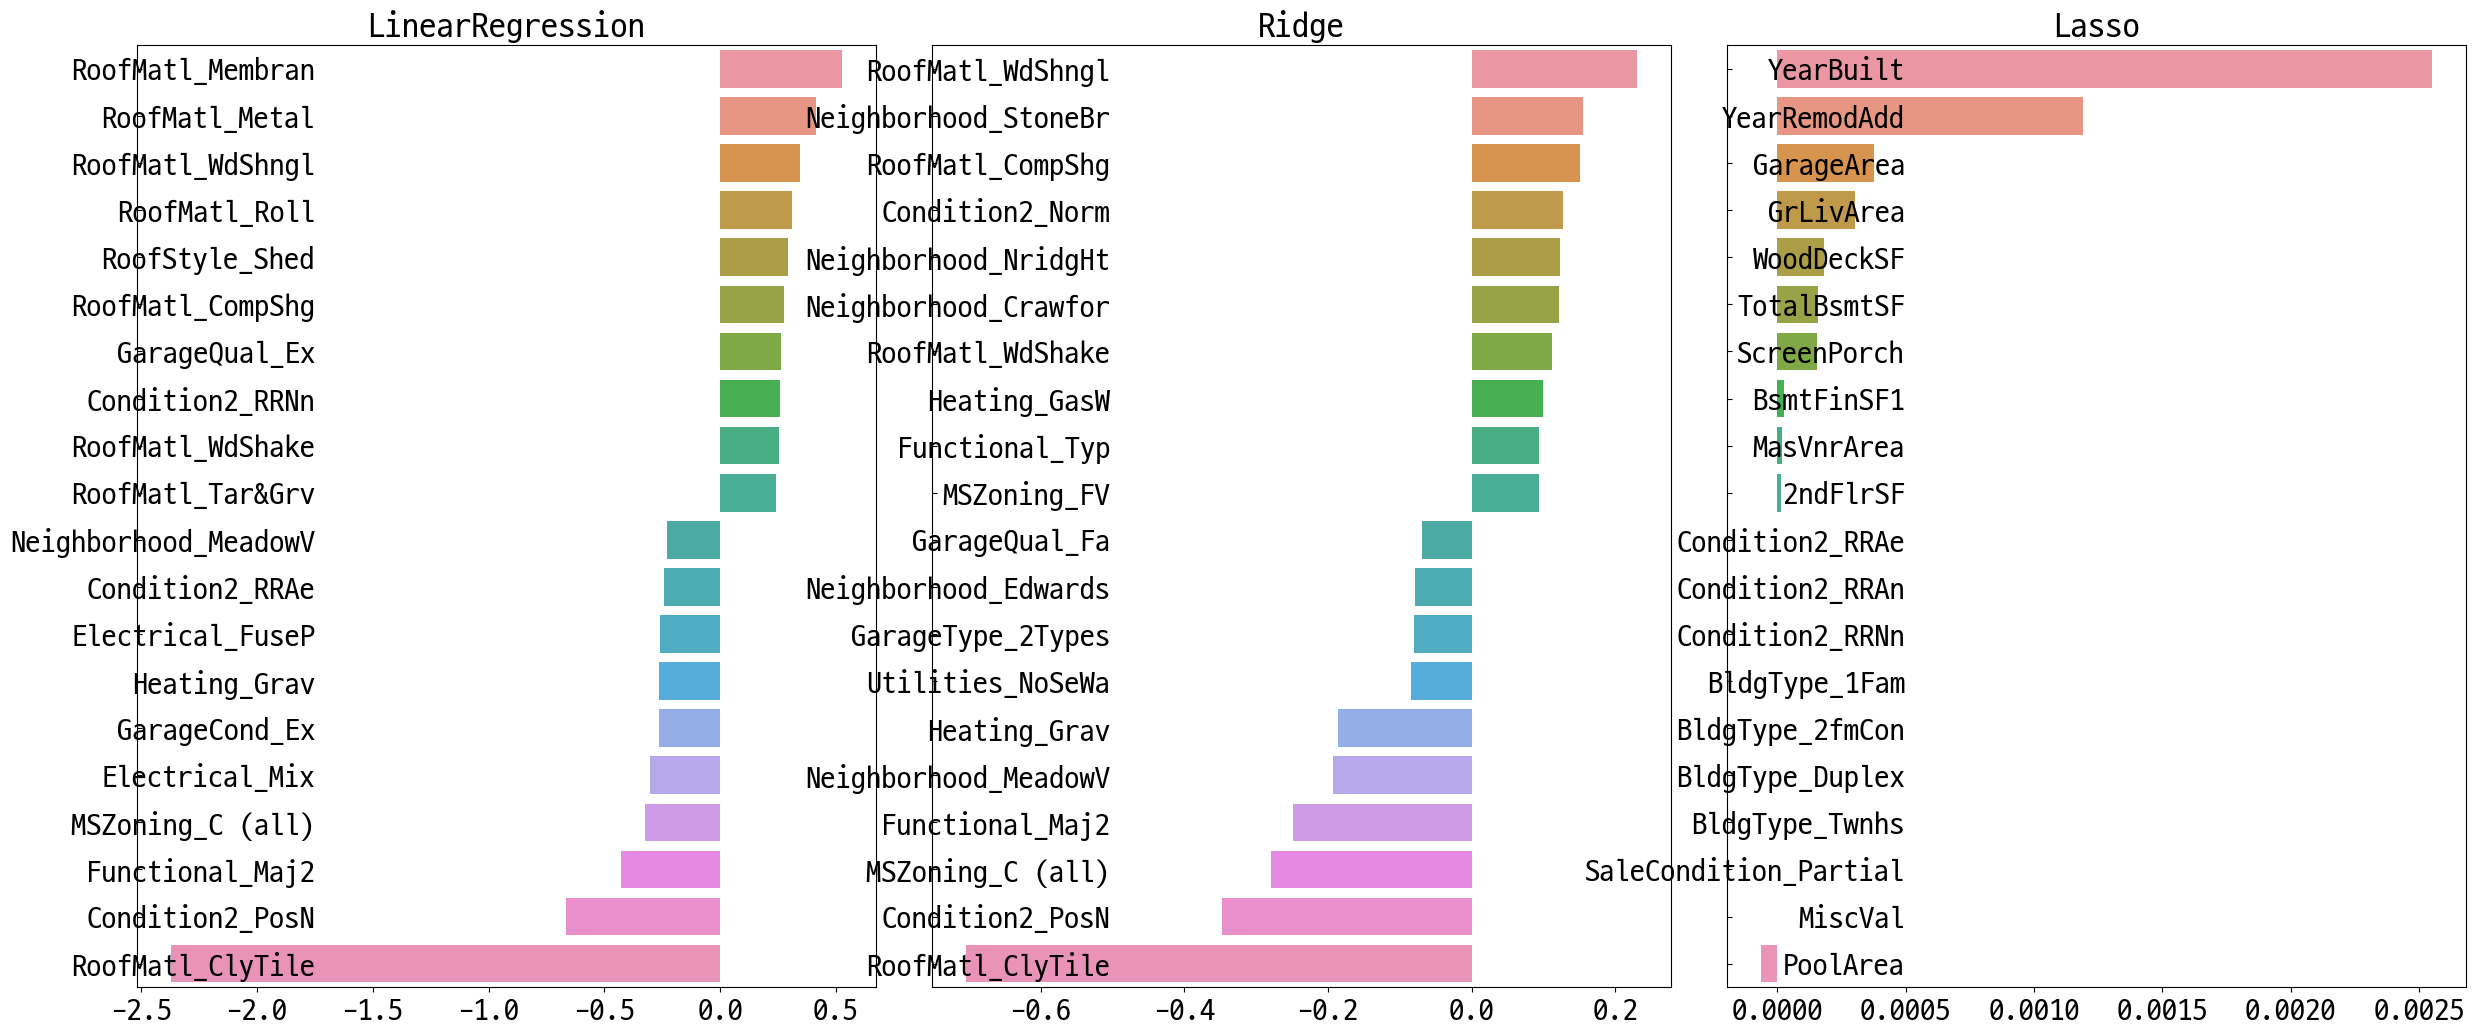

In [54]:
plt.rcParams['axes.unicode_minus'] = False
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [57]:
def get_avg_rmse_cv(models):
    from sklearn.model_selection import cross_val_score
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,
                                             X,
                                             y,
                                             scoring='neg_mean_squared_error',
                                             cv = 5))
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__}rmse 값 리스트 : {rmse_list}')
        print(f'{model.__class__.__name__}rmse 값 평  균 : {rmse_avg}')

In [58]:
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)
# LinearRegression  로그 변환된 RMSE: 0.13189576579154072
# Ridge  로그 변환된 RMSE: 0.12750846334053154
# Lasso  로그 변환된 RMSE: 0.17628250556471395

LinearRegressionrmse 값 리스트 : [0.13532312 0.16457906 0.167651   0.11089677 0.19808115]
LinearRegressionrmse 값 평  균 : 0.15530621901706115
Ridgermse 값 리스트 : [0.11725334 0.15439419 0.14208945 0.11652709 0.18898702]
Ridgermse 값 평  균 : 0.14385021807917392
Lassormse 값 리스트 : [0.16077499 0.20437243 0.17676683 0.18127643 0.2651206 ]
Lassormse 값 평  균 : 0.1976622573181429


In [62]:
def print_best_params(model, params):
    from sklearn.model_selection import GridSearchCV
    grid_model = GridSearchCV(model,
                              param_grid = params,
                              scoring = 'neg_mean_squared_error',
                              cv = 5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-grid_model.best_score_)
    print(f'{model} 최적 rmse: {rmse}, 최적의 alpha: {grid_model.best_params_}')
    

In [63]:
ridge_params = {'alpha':[0.05,0.1,1,5,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge() 최적 rmse: 0.14176729913304334, 최적의 alpha: {'alpha': 12}
Lasso() 최적 rmse: 0.14198359088571505, 최적의 alpha: {'alpha': 0.001}


In [64]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
# LinearRegression  로그 변환된 RMSE: 0.13189576579154072
# Ridge  로그 변환된 RMSE: 0.12750846334053154
# Lasso  로그 변환된 RMSE: 0.17628250556471395

LinearRegression  로그 변환된 RMSE: 0.13189576579154072
Ridge  로그 변환된 RMSE: 0.12387044279987358
Lasso  로그 변환된 RMSE: 0.11995999974065162


[0.13189576579154072, 0.12387044279987358, 0.11995999974065162]

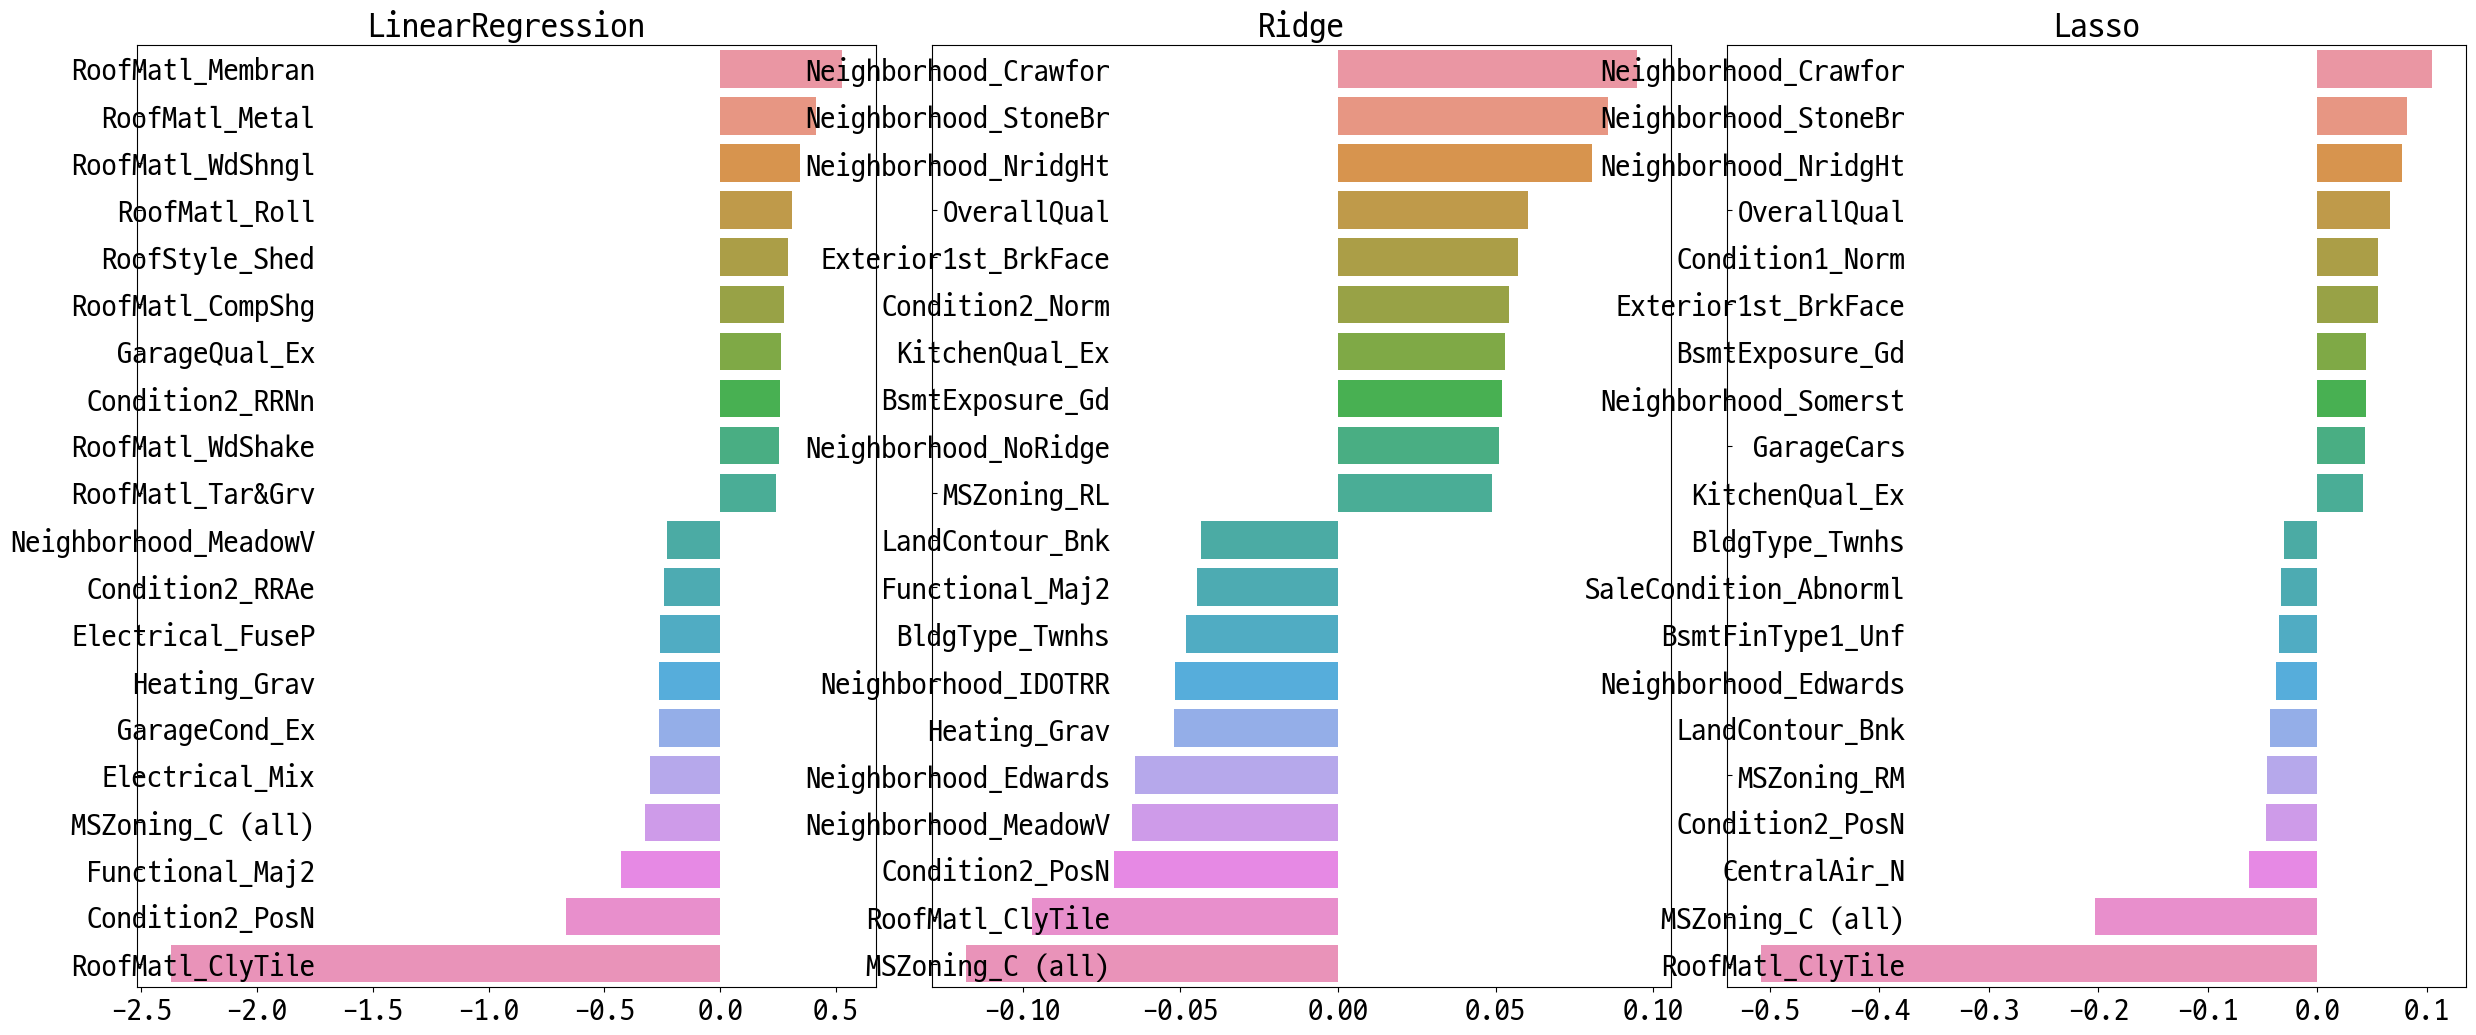

In [65]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

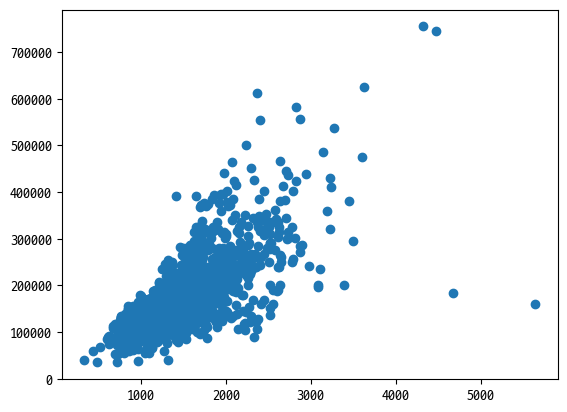

In [66]:
plt.scatter(x=house_df_org['GrLivArea'], y=house_df_org['SalePrice'])

In [67]:
cond1 = house_df_ohe['GrLivArea'] > 4000
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)

In [71]:
outlier_index = house_df_ohe[cond1 & cond2].index

In [72]:
outlier_index

Int64Index([523, 1298], dtype='int64')

In [73]:
house_df_ohe.shape

(1460, 271)

In [74]:
house_df_ohe.drop(index=outlier_index, inplace=True)

In [75]:
house_df_ohe.shape

(1458, 271)

In [77]:
y = house_df_ohe['SalePrice']
X = house_df_ohe.drop(columns=['SalePrice'])
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2,
                                                 random_state = 156)
lr_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()

ridge_params = {'alpha':[0.05,0.1,1,5,10,12,15,20]}
lasso_params = {'alpha':[0.001,0.005,0.008,0.05,0.03,0.1,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge() 최적 rmse: 0.11413122076804948, 최적의 alpha: {'alpha': 15}
Lasso() 최적 rmse: 0.1136287058798075, 최적의 alpha: {'alpha': 0.001}


In [78]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg = Ridge(alpha=15)
ridge_reg.fit(X_train,y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train,y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
# LinearRegression  로그 변환된 RMSE: 0.13189576579154072
# Ridge  로그 변환된 RMSE: 0.12387044279987358
# Lasso  로그 변환된 RMSE: 0.11995999974065162

LinearRegression  로그 변환된 RMSE: 0.1282537684463086
Ridge  로그 변환된 RMSE: 0.10271076726751315
Lasso  로그 변환된 RMSE: 0.10164576101982135


[0.1282537684463086, 0.10271076726751315, 0.10164576101982135]

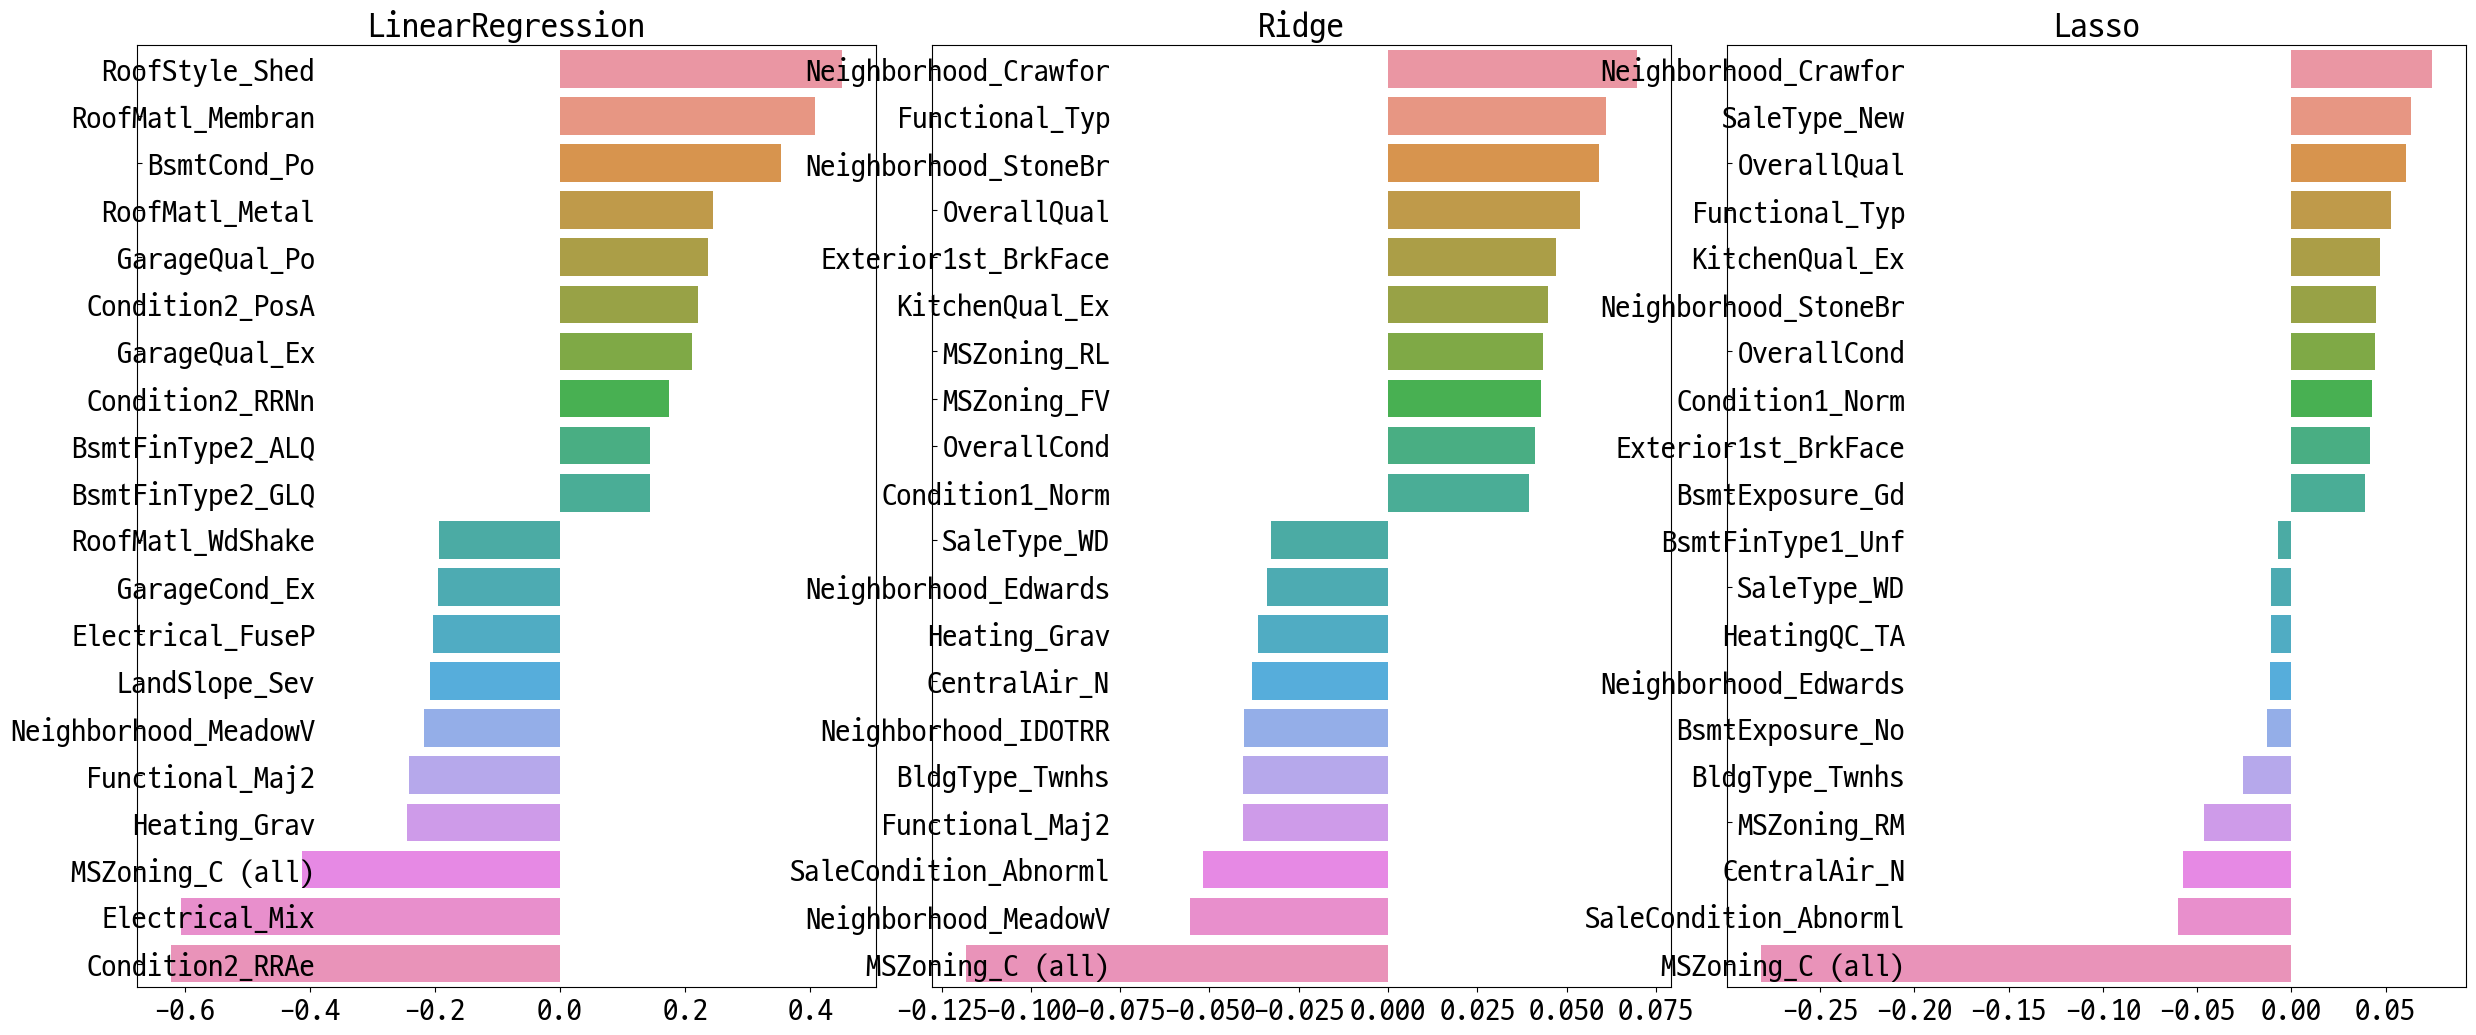

In [79]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)